# WHAT YOU WILL LEARN

- CREATING GRAPHS (Colors) 
- UNDERSTAND THE RELATIONSHIP BETWEEN FEATURES 
- CERATING DUMMIES (ONE HOT ENCODING )
- SCALING DATA
- SPLITING DATA IN TRAINING AND TEST [***]
- SPLITTING DATA INTO FEATURES (INPUTS) AND LABLES (OUTPUTS) [***]
- TWO LAYER NEURAL NETWORK [***]
    - Sigmiod 
    - error formula
- BACKPROPAGATE THE ERROR [**]
- TRANING FUNCTION [***]
- CLACULATING ACCURACY [***]

# Using Neural Networks to Predict Graducate School Admissions

#### Context:
The admissions office delibrate on admission decisions for weeks. They make a admission decision by going through each students GRE and GPA Scores. This process is might be manually biased by evaluator, student name, race, etc. The admission office want to introduce a ML model to automate, remove bias, expidite the admission process. The addmission office will evluate and approve the resulted model. 

#### What data do we have? 
We have a collection of historical best addmission set. 
- The instance is weather a student is admited or not (Y/N)
- The feature (what we know of instance) is GRE, GPA, Rank)
Basically, we are given a historical data that shows what critriea of gre, gpa has lead to admission. THis historical data has pattern. Using this pattern we need to predict proability of a student getting addmitted to graduate school. 

#### Need: 
What problem are we sloving with the intelligence? We are introducing ML model to drive the addmission discussion. 

#### Vision:
When we succesfully slove this, we will know right away if a student based on Grades and Test Scores, will be admitted.

#### Outcome:
Admissions office will use this model to evaluate each stundet as a primary. 

In [65]:
#Importing pandas, numpy, matplotlib

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mp

In [26]:
# Reading data
data = pd.read_csv('student_data.csv')
data.head(5)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


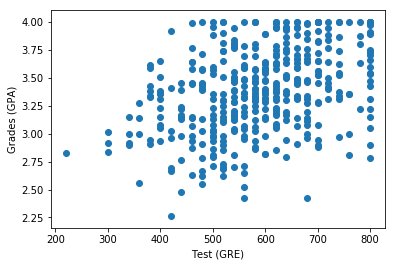

In [68]:
#Ploting GRE AND GPA 
plt.scatter(data.gre, data.gpa)
plt.xlabel('Test (GRE)')
plt.ylabel('Grades (GPA)')
plt.show()

##### We need to introduce a third data point: which of the above point is admitted?
- admitted -> turn the dot to GREEN
- Not addmitted -> turn the dot to RED 

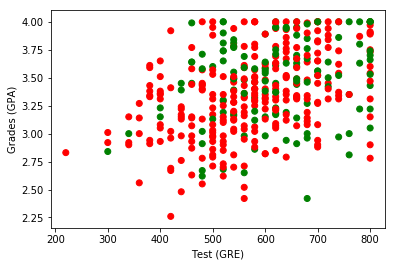

In [67]:
#Ploting GRE AND GPA
colors = ['red','green']
plt.scatter(data.gre, data.gpa, c = data.admit,  cmap=mp.colors.ListedColormap(colors))
plt.xlabel('Test (GRE)')
plt.ylabel('Grades (GPA)')
plt.show()

##### Roughly, it looks like the students with high scores in the grades and test passed, while the ones with low scores didn't

- But the data is not as nicely separable as we hoped it would. Maybe it would help to take the rank into account?
- Let's make 4 plots, each one for each rank.

Text(0.5, 1.0, 'Rank 1')

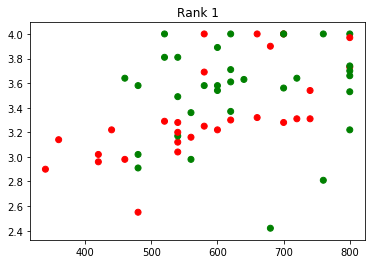

In [75]:
# Separating the ranks
data_rank1 = data[data["rank"]==1]
data_rank1
colors = ['red','green']
plt.scatter(data_rank1.gre, data_rank1.gpa, c = data_rank1.admit,  cmap=mp.colors.ListedColormap(colors))
plt.title("Rank 1")

Text(0.5, 1.0, 'Rank 4')

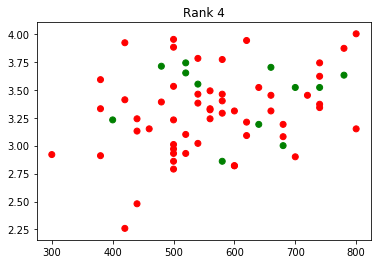

In [77]:
# Separating the ranks
data_rank1 = data[data["rank"]==4]
data_rank1
colors = ['red','green']
plt.scatter(data_rank1.gre, data_rank1.gpa, c = data_rank1.admit,  cmap=mp.colors.ListedColormap(colors))
plt.title("Rank 4")

#### Based on the Rank 1 vs. Rank 4 plots, there is correlation between Admissions and Rank. Higher the rank, higher the admittance. Rank1 chart has more green vs. Rank 4

#### Let's use the rank as one of our inputs. In order to do this, we should one-hot encode it.

## Make dummy variables for rank

STEP 1: 
Concatenate pandas objects along a particular axis with optional set logic along the other axes

pandas.concat(objs, axis=0, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=None, copy=True)[source]

STEP 2:
pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)


In [111]:
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix = 'rank')], axis = 1)
one_hot_data.head(5)

,admit,gre,gpa,rank,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,3,0,0,1,0
1,1,660,3.67,3,0,0,1,0
2,1,800,4.00,1,1,0,0,0
3,1,640,3.19,4,0,0,0,1
4,0,520,2.93,4,0,0,0,1


In [112]:
#SInce we do not need column rank any longer. Lets drop it

one_hot_data = one_hot_data.drop('rank',axis = 1)

In [113]:
one_hot_data.head(5)

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


## Scaling the data
The next step is to scale the data. We notice that the range for grades is 1.0-4.0, whereas the range for test scores is roughly 200-800, which is much larger. This means our data is skewed, and that makes it hard for a neural network to handle. Let's fit our two features into a range of 0-1, by dividing the grades by 4.0, and the test score by 800.

In [114]:
# Making a copy of our data
processed_data = one_hot_data
processed_data.head(5)

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


In [115]:
# TODO: Scale the columns
processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gpa']/4.0
# Printing the first 10 rows of our procesed data
processed_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1
5,1,0.950,0.7500,0,1,0,0
6,1,0.700,0.7450,1,0,0,0
7,0,0.500,0.7700,0,1,0,0
8,1,0.675,0.8475,0,0,1,0
9,0,0.875,0.9800,0,1,0,0


## Splitting the data into Training and Testing

In order to test our algorithm, we'll split the data into a Training and a Testing set. The size of the testing set will be 10% of the total data.

In [119]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
#print(train_data[:10])
#print(test_data[:10])

Number of training samples is 360
Number of testing samples is 40


## Splitting the data into features and targets (labels)
Now, as a final step before the training, we'll split the data into features (X) and targets (y).
- Feautres (Inputs) are All columns except the ADMIT column
- Targets or Label (Output) only the ADMIT column

In [126]:
features = train_data.drop('admit', axis=1)
targets = train_data['admit']
features_test = test_data.drop('admit', axis=1)
targets_test = test_data['admit']

print(features[:10])
print(targets[:10])

       gre     gpa  rank_1  rank_2  rank_3  rank_4
57   0.475  0.7350       0       0       1       0
355  0.950  0.7025       1       0       0       0
392  0.750  0.8450       0       0       1       0
121  0.600  0.6675       0       1       0       0
291  1.000  0.6950       0       1       0       0
123  0.625  0.7450       0       0       1       0
148  0.600  0.7275       1       0       0       0
287  0.825  0.9250       0       0       0       1
395  0.775  1.0000       0       1       0       0
36   0.725  0.8125       1       0       0       0
57     0
355    1
392    1
121    1
291    0
123    0
148    1
287    1
395    0
36     0
Name: admit, dtype: int64


## Training the 2-layer Neural Network
The following function trains the 2-layer neural network. First, we'll write some helper functions.

In [124]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

# Backpropagate the error
Write the error term. Remember that this is given by the equation $$ -(y-\hat{y}) \sigma'(x) $$

In [125]:
def error_term_formula(y, output):
    return (y - output) * output* (1-output)

In [127]:
# Neural Network hyperparameters
epochs = 1000
learnrate = 0.5

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error, the target minus the network output
            error = error_formula(y, output)

            # The error term
            #   Notice we calulate f'(h) here instead of defining a separate
            #   sigmoid_prime function. This just makes it faster because we
            #   can re-use the result of the sigmoid function stored in
            #   the output variable
            error_term = error_term_formula(y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

Epoch: 0
Train loss:  0.27567683081653893
Epoch: 100
Train loss:  0.20387768820609614
Epoch: 200
Train loss:  0.2011139127164656
Epoch: 300
Train loss:  0.1999196971398297
Epoch: 400
Train loss:  0.19932262234045478
Epoch: 500
Train loss:  0.19896335108286783
Epoch: 600
Train loss:  0.19870646796036637
Epoch: 700
Train loss:  0.19849787985523612
Epoch: 800
Train loss:  0.19831442443198727
Epoch: 900
Train loss:  0.1981454655339886
Finished training!


## Calculating the Accuracy on the Test Data

In [129]:
# Calculate accuracy on test data
tes_out = sigmoid(np.dot(features_test, weights))
predictions = tes_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.550
